In [21]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
clinical = pd.read_csv('clinicaltrial_data.csv')
mouse = pd.read_csv('mouse_drug_data.csv')

# Combine the data into a single dataset
data = pd.merge(clinical, mouse, on='Mouse ID', how='inner')
data.head()




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [22]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped = data.groupby(['Drug', 'Timepoint'])


In [23]:
# Convert to DataFrame
tumor_df = pd.DataFrame()
tumor_df['Tumor Volume (mm3)'] = grouped['Tumor Volume (mm3)'].mean()
tumor_df['Standard Error'] = grouped['Tumor Volume (mm3)'].sem()
# Preview DataFrame
tumor_df.head()

Tumor Volume (mm3)  Standard Error
Drug      Timepoint                                    
Capomulin 0                   45.000000        0.000000
          5                   44.266086        0.448593
          10                  43.084291        0.702684
          15                  42.064317        0.838617
          20                  40.716325        0.909731

In [24]:
tumor_mean = tumor_df['Tumor Volume (mm3)'].unstack(level=0)
tumor_stder = tumor_df['Standard Error'].unstack(level=0)
tumor_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


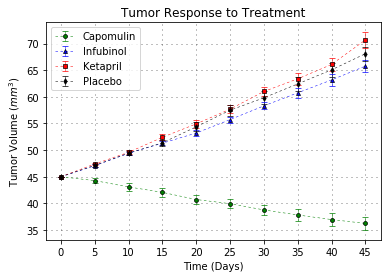

In [27]:
drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
colors = ['g', 'b', 'r', 'k']
markers = ['o', '^', 's', 'd']
x = tumor_mean.index
for i in range(len(drugs)):
    drug = drugs[i]
    plt.errorbar(x, tumor_mean[drug], yerr=tumor_stder[drug], linestyle='--', linewidth=0.5, dashes=(5, 5), 
                 color=colors[i], capsize=3, marker=markers[i], markersize=4, markerfacecolor=colors[i], 
                 markeredgecolor='k', markeredgewidth=0.7, capthick=0.7)

plt.xticks(range(0,46,5))    
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume ($mm^3$)')
plt.title('Tumor Response to Treatment')
plt.legend(drugs)
plt.grid(linestyle='--', dashes=(2, 8), linewidth=0.5, color='k')   
plt.show()

## Metastatic Response to Treatment

In [29]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
grouped = data.groupby(['Drug', 'Timepoint'])
# Convert to DataFrame
meta_df = pd.DataFrame()
meta_df['Metastatic Sites'] = grouped['Metastatic Sites'].mean()
meta_df['Standard Error'] = grouped['Metastatic Sites'].sem()
# Preview DataFrame
meta_df.head()

Metastatic Sites  Standard Error
Drug      Timepoint                                  
Capomulin 0                  0.000000        0.000000
          5                  0.160000        0.074833
          10                 0.320000        0.125433
          15                 0.375000        0.132048
          20                 0.652174        0.161621

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [30]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_mean = meta_df['Metastatic Sites'].unstack(level=0)
metastatic_se = meta_df['Standard Error'].unstack(level=0)

# Preview that Reformatting worked
metastatic_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


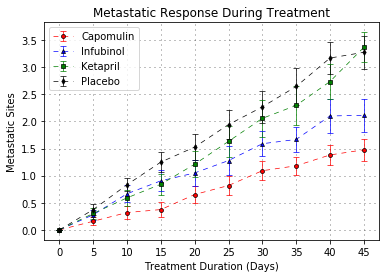

In [34]:
# Generate the Plot (with Error Bars)
drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
markers = ['o', '^', 's', 'd']
colors = ['r', 'b', 'g', 'k']
x = metastatic_mean.index
for i in range(len(drugs)):
    drug = drugs[i]
    plt.errorbar(x, metastatic_mean[drug], yerr=metastatic_se[drug], linestyle='--', linewidth=0.7, 
                 dashes=(7, 7), color=colors[i], capsize=3, marker=markers[i], markersize=4, 
                 markerfacecolor=colors[i], markeredgecolor='k', markeredgewidth=0.7, capthick=0.7)

plt.xticks(range(0,46,5))    
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Metastatic Sites')
plt.title('Metastatic Response During Treatment')
plt.legend(drugs)
plt.grid(linestyle='--', dashes=(2, 8), linewidth=0.5, color='k')
# Save the Figure

# Show the Figure
plt.show()

## Survival Rates

In [38]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
grouped = data.groupby(['Drug', 'Timepoint'])
# Convert to DataFrame
survival_df = pd.DataFrame()
survival_df['Mouse Count'] = grouped['Mouse ID'].count()

# Preview DataFrame
survival_df.head()


Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [40]:
count_survival = survival_df['Mouse Count'].unstack(level=0)
count_survival.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


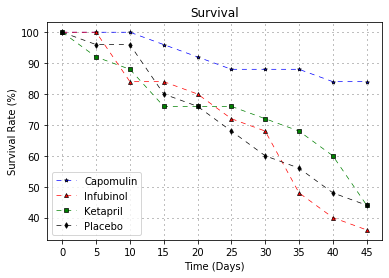

In [44]:

drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
markers = ['*', '^', 's', 'd']
colors = ['b', 'r', 'g', 'k']
x = survival_count.index
for i in range(len(drugs)):
    drug = drugs[i]
    rate_survival = count_survival[drug] / count_survival.loc[0, drug] * 100
    plt.errorbar(x, rate_survival, linestyle='--', linewidth=0.7, 
                 dashes=(7, 7), color=colors[i], marker=markers[i], markersize=4, 
                 markerfacecolor=colors[i], markeredgecolor='k', markeredgewidth=0.7)

plt.xticks(range(0,46,5))
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
plt.title('Survival')
plt.legend(drugs)
plt.grid(linestyle='--', dashes=(2, 8), linewidth=0.5, color='k')
# Show the Figure
plt.show()

## Summary Bar Graph

In [54]:
# Calculate the percent changes for each drug
grouped = data.groupby(['Drug', 'Timepoint'])
tumor_chg = pd.DataFrame()
tumor_chg['Tumor Change'] = grouped['Tumor Volume (mm3)'].mean()

tumor_chg = tumor_chg.unstack(level=-1)
tumor_chg.columns = tumor_chg.columns.droplevel(level=0)
tumor_chg['Percent Tumor Change'] = (tumor_chg[45] - tumor_chg[0]) / tumor_chg[0] * 100
tumor_chg = tumor_chg[['Percent Tumor Change']]
tumor_chg.head()

Timepoint,Percent Tumor Change
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347


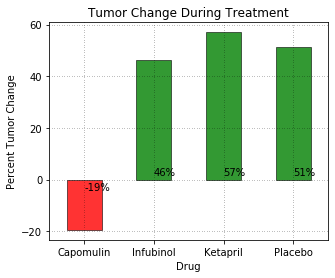

In [76]:
drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
colors = ['g' if (tumor_chg.loc[drug]>0).values[0] else 'r' for drug in drugs]
ax = tumor_chg.loc[drugs].plot(kind='bar', color=[tuple(colors)], rot=0, legend=False, alpha=0.8,
                            edgecolor = 'k', linewidth=0.7, width=.5, figsize=(5,4))

plt.yticks(range(-20,70,20))
plt.ylabel('Percent Tumor Change')
plt.title('Tumor Change During Treatment')
plt.grid(linestyle='--', dashes=(1, 4), linewidth=0.5, color='k')

posx = range(len(drugs))
posy = [1 if (tumor_chg.loc[drug]>0).values[0] else -1 for drug in drugs]
va = ['bottom' if (tumor_chg.loc[drug]>0).values[0] else 'top' for drug in drugs]
labels = tumor_chg.loc[drugs].values
for i in range(len(drugs)):
    ax.text(posx[i], posy[i], '%1.0d%%' % int(labels[i]), va=va[i], color='k')  

plt.show()


                               

In [77]:
#Three Observations:
#Capomulin is the only drug that shows an absolute decreasing affect on the size of the tumor
#Ketrapil actually increases the rate at which the tumor grows
#INfrubinol decreases survival rate relative to the Placebo
